In [1]:
% matplotlib inline

import sys
import numpy as np
import scipy.io as sio
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from datetime import date
import pandas as pd
from netCDF4 import Dataset

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 18})

/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/sclayton/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/sclayton/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/sclayton/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/kernelap

In [2]:
def loadLCS(path):
    content = sio.loadmat(path)
    X = content['X1']
    Y = content['Y1']
    lon = content['lon']
    lat = content['lat']
#     X = X - 360
    return X, Y, lon, lat

def tracerBlock(X, Y, lon_index, lat_index, hw):
    lons = []
    lats = []
    for on in lon_index:
        for at in lat_index:
            lons.append((X[on-hw:on+hw+1, at-hw:at+hw+1]).flatten())
            lats.append((Y[on-hw:on+hw+1, at-hw:at+hw+1]).flatten())
    lons = np.asarray(lons).flatten()
    lats = np.asarray(lats).flatten()
    return lons, lats   

def all_site_indices(lon, lat, site_lons, site_lats):
    lon_index = []
    lat_index = []
    for ll in site_lons:
        lon_index.append(np.argmin(np.abs(np.abs(lon)-ll)))
    for ll in site_lats:
        lat_index.append(np.argmin(np.abs(lat-ll)))
    return lon_index, lat_index

In [3]:
# load observational data points

infile ='../data/obs_coords.xlsx'
obs = pd.read_excel(infile)

print obs.columns

# import MDT data
infile = '../../kuroshio_chapter/data/sla/dt_global_allsat_msla_h_20091020_20140106.nc'
mdt_data = Dataset(infile, mode='r')

mdt_data.variables

mdt = np.squeeze(mdt_data.variables['sla'])
lats = mdt_data.variables['lat'][:]
lons = mdt_data.variables['lon'][:]

lon_mdt, lat_mdt = np.meshgrid(lons, lats)

mdt[mdt<-3] = np.nan

Index([u'year', u'month', u'ref', u'lat', u'lon', u'method', u'result'], dtype='object')


1
2
3
4
5
6
7
8
9
10
11
12
13
14


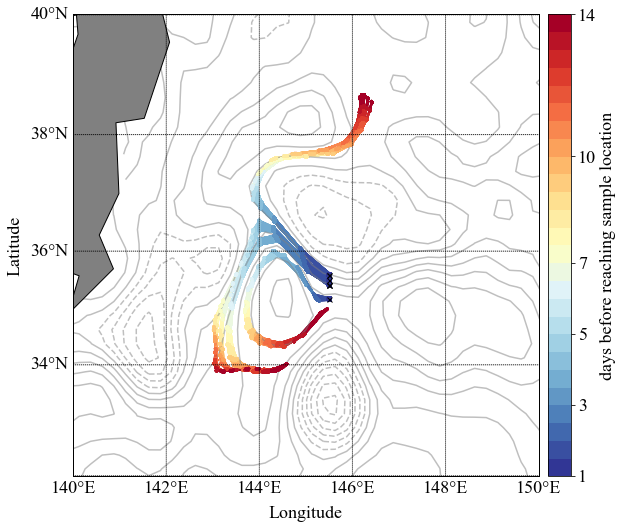

In [14]:
date = ['Oct 21', 'Oct 22']

hw = 2

fig0, ax1 = plt.subplots(1, figsize=(9,9), dpi = 300)

m = Basemap(projection='merc',llcrnrlat=32.,urcrnrlat=40.01,\
            llcrnrlon=140.,urcrnrlon=150.,lat_ts=0,resolution='c', ax = ax1)

mcon = plt.get_cmap('RdYlBu_r', 30)

xii, yii = m(lon_mdt, lat_mdt)
# mm = m.contourf(xii,yii,mdt, cmap = mcon, vmin = -0.5, vmax = 1.75, lw = 3, zorder = 0, alpha = 0.5)
# m.colorbar(mm)

m.contour(xii,yii,mdt,levels = np.arange(-2, 2, 0.1), colors = 'grey', lw = 5, zorder = 1, alpha = 0.5)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')


maxday = 14
palette = plt.get_cmap('RdYlBu_r', (maxday-1)*2)
norm = colors.Normalize(vmin=1, vmax=maxday)

da = 'Oct 22'

if da == 'Oct 18':
    #Oct 18
    indir = '../data/trajectories/Oct18/'
    site_lons=[143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 143.5]
    site_lats=[36.6102, 35.9347, 35.8443, 35.7645, 35.6807, 35.5985, 35.5208, 35.4323]
elif da == 'Oct 19':
    #Oct 19
    indir = '../data/trajectories/Oct19/'
    site_lons=[144., 144., 144., 144., 144., 144., 144., 144.]
    site_lats=[36.0485, 36.127, 36.2273, 36.2977, 36.3885, 36.471, 36.5502, 36.6308]
elif da =='Oct 20':
    #Oct 20
    indir = '../data/trajectories/Oct20/'
    site_lons=[144.5, 144.5, 144.5, 144.5, 144.5, 144.5, 144.5, 144.5]
    site_lats=[36.5, 36.4148, 36.3287, 36.1602, 36.079, 35.9967, 35.9117, 35.831, 35.743]
elif da == 'Oct 21':
    #Oct 21
    indir = '../data/trajectories/Oct21/'
    site_lons=[145., 145., 145., 145., 145., 145., 145., 145.]
    site_lats=[35.6712, 35.7537, 35.8347, 35.916, 35.9997, 36.0818, 36.1672, 35.6667]
    jdate = '0002009294'
elif da == 'Oct 22':
    #Oct 22
    indir = '../data/trajectories/Oct22/'
    site_lons=[145.5, 145.5, 145.5, 145.5, 145.5, 145.5, 145.5]
    site_lats=[35.5833, 35.5, 35.4167, 35.4167, 35.4167, 35.1667, 35.587]
    jdate = '0002009295'


sx, sy = m(site_lons, site_lats)
m.plot(sx, sy,'xk', markersize = 5)

# step through days to find trajectories
for d in range(1,maxday + 1):
    path = '%s%s_%010d.mat' % (indir, jdate, d)
    X, Y, lon, lat = loadLCS(path)

    # set the domain
    min_lon=np.min(lon)
    max_lon=np.max(lon)
    min_lat=np.min(lat)
    max_lat=np.max(lat)
    lon = np.arange(min_lon, max_lon+0.01,0.01)
    lat = np.arange(min_lat, max_lat+0.01,0.01)

    # find domain indices for site coordinates
    lon_index, lat_index = all_site_indices(lon, lat, site_lons, site_lats)

    lons, lats = tracerBlock(X, Y, lon_index, lat_index, hw)
    x, y = m(lons, lats)
    cb = m.scatter(x,y, s=5, c=np.ones(len(x))*d, vmin = 1, vmax = maxday, cmap = palette)
    
    if d > 1:
        m.scatter(x,y, s=5, c=np.ones(len(x))*d, vmin = 1, vmax = maxday, cmap = palette, alpha = 0.75,zorder = 1)
        for dd in range(len(xold)):
            m.plot([xold[dd],x[dd]], [yold[dd], y[dd]], '-', color = palette(norm(d-0.5)), alpha = 0.5, zorder = 0)
    xold = x
    yold = y
    print d
    
m.drawparallels(np.arange(-50,80,2),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,2),labels=[0,0,0,1])
cbar = m.colorbar(cb, ticks = [1, 3, 5, 7, 10, 14])
cbar.set_label('days before reaching sample location')

plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.xlabel('Longitude', labelpad = 30)
plt.ylabel('Latitude', labelpad = 50)

plt.show()

fig0.savefig('../figures/traj_E.png', dpi = 300)